# (N)on-(E)uclidean (U)pgrading
---
#### Description of NEU:
The NEU meta-algorithm learns a geometry for the input and (input $\times$ output) spaces by deforming them with a universal class of homeomorphisms + robustifies the involved loss functions to improve generalizability of the new and very flexible model.  
$$
\begin{aligned}
f \mapsto& \, \rho \circ f \circ \phi\\
\mathbb{E}_{\mathbb{P}}[\ell(f(X))] \mapsto & \,\max_{\mathbb{Q}\sim \mathbb{P}}\, \mathbb{E}_{\mathbb{Q}}[\ell(\rho(\phi(X), f\circ \phi(X)))].
\end{aligned}
$$
$\rho=\pi\circ \tilde{\rho}$, and $\tilde{\rho}$ and $\phi$ are "universal homeomorphisms" on $\operatorname{dom}(f)$ and on $\operatorname{dom}(f)\times \operatorname{co-dom}(f)$, respectively.  

---

---

#### Description of regression problem: 
In this notebook we implement the regression problem
$$
\begin{aligned}
y_i =&  \,f(x_i)\delta_i + \epsilon_i, \qquad i=1,\dots,N\\
\epsilon_i \sim &\, \mathcal{N}(0,\sigma),\\
\delta_i\sim &  \,U(1-D,1+D),
\end{aligned}
$$
for some *variance* $\sigma>0$ and *degree of model misspecification level* $0<D<1$.  
The quantity $\epsilon$ can be understood as, classical, additive noise while the quantity $\delta$ represents multiplicative noise.

---

---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [142]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# Load Hyper( and meta) parameter(s)
%run Helper_Functions.ipynb

Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!


## Initialize Internal Variables/(Hyper)parameter(s)

## Check/Make Paths

In [143]:
Path('./outputs/models/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/GLd_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/Ed_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Linear_Regression/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/Base_Regressor/').mkdir(parents=True, exist_ok=True)
Path('./outputs/tables/').mkdir(parents=True, exist_ok=True)
Path('./outputs/results/').mkdir(parents=True, exist_ok=True)
Path('./inputs/data/').mkdir(parents=True, exist_ok=True)

# Generate Training Data

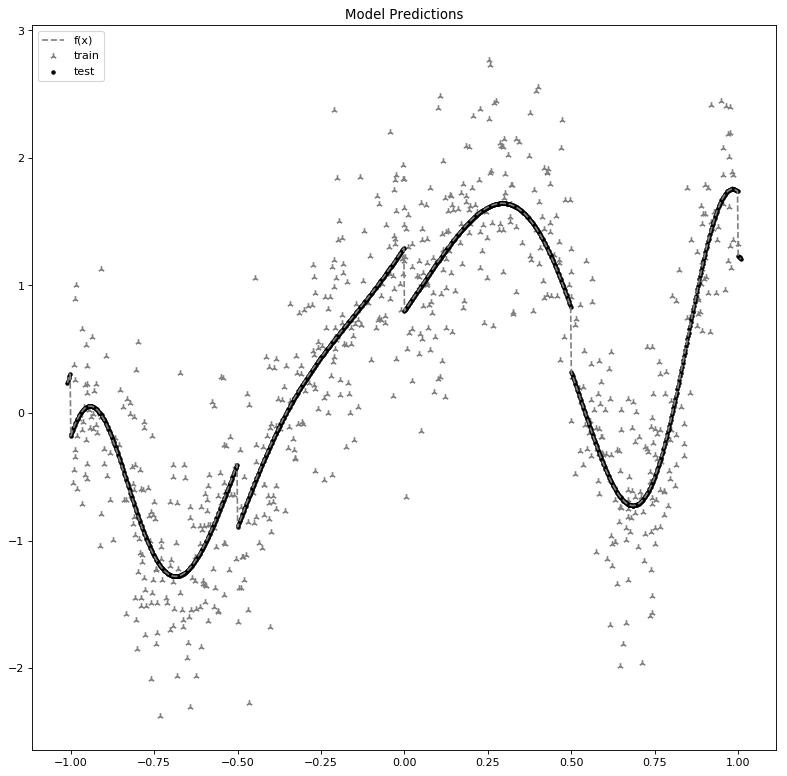

In [144]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
%run Data_Generator.ipynb

#### Prepare data for NEU

## 1) Get Basic Regression Models
 1. Get Base regression model (benchmark),
 2. Get Base regression model for NEU.

## Get basic regression model - Benchmark

In [145]:
if False:#os.path.exists('./outputs/models/Benchmarks/Linear_Regression/saved_model.pb'):
    #------------------#
    # Load Readout Map #
    #------------------#
    print('Benchmark model - already exists: Loading...')
    regression_Benchmark = tf.keras.models.load_model("./outputs/models/Benchmarks/Linear_Regression/")
    print('Benchmark model - already exists: Loaded.')
else:
    print('Pre-trained benchmark model does not exist: Training.')
    tf.random.set_seed(2020)
    ffNN_y_hat_train,ffNN_y_hat_test = build_ffNN(n_folds =2, 
                                                 n_jobs = 3, 
                                                 n_iter = 1, 
                                                 param_grid_in = param_grid_Vanilla_Nets, 
                                                 X_train = data_x, 
                                                 y_train = data_y,
                                                 X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    9.8s finished


Epoch 1/200
47/47 [==============================] - 0s 1ms/step - loss: 0.9874 - mse: 1.4806 - mae: 0.9874 - mape: 367.6802
Epoch 2/200
47/47 [==============================] - 0s 1ms/step - loss: 0.8497 - mse: 1.0933 - mae: 0.8497 - mape: 359.0973
Epoch 3/200
47/47 [==============================] - 0s 1ms/step - loss: 0.7981 - mse: 0.9669 - mae: 0.7981 - mape: 394.3000
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 0.7549 - mse: 0.8720 - mae: 0.7549 - mape: 346.9420
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6919 - mse: 0.7586 - mae: 0.6919 - mape: 310.4397
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6865 - mse: 0.7649 - mae: 0.6865 - mape: 354.4772
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6812 - mse: 0.7387 - mae: 0.6812 - mape: 334.1715
Epoch 8/200
47/47 [==============================] - 0s 2ms/step - loss: 0.7109 - mse: 0.8045 - mae: 0.7109 - mape: 347.0610


47/47 [==============================] - 0s 1ms/step - loss: 0.5469 - mse: 0.5100 - mae: 0.5469 - mape: 211.3818
Epoch 67/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5289 - mse: 0.4816 - mae: 0.5289 - mape: 193.7790
Epoch 68/200
47/47 [==============================] - 0s 995us/step - loss: 0.5302 - mse: 0.4844 - mae: 0.5302 - mape: 217.8330
Epoch 69/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5338 - mse: 0.4896 - mae: 0.5338 - mape: 223.8483
Epoch 70/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5486 - mse: 0.4973 - mae: 0.5486 - mape: 215.8945
Epoch 71/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5714 - mse: 0.5425 - mae: 0.5714 - mape: 224.8864
Epoch 72/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5547 - mse: 0.5143 - mae: 0.5547 - mape: 222.1597
Epoch 73/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5440 - mse: 0.4960 - mae: 0.5440 - mape: 195.7132
Epo

47/47 [==============================] - 0s 1ms/step - loss: 0.4783 - mse: 0.3546 - mae: 0.4783 - mape: 169.7426
Epoch 131/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4538 - mse: 0.3250 - mae: 0.4538 - mape: 206.2045
Epoch 132/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4905 - mse: 0.3832 - mae: 0.4905 - mape: 227.0946
Epoch 133/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4740 - mse: 0.3538 - mae: 0.4740 - mape: 265.1052
Epoch 134/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4613 - mse: 0.3397 - mae: 0.4613 - mape: 248.5148
Epoch 135/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4677 - mse: 0.3434 - mae: 0.4677 - mape: 205.8597
Epoch 136/200
47/47 [==============================] - 0s 988us/step - loss: 0.4663 - mse: 0.3491 - mae: 0.4663 - mape: 213.6099
Epoch 137/200
47/47 [==============================] - 0s 990us/step - loss: 0.4867 - mse: 0.3786 - mae: 0.4867 - mape: 184

47/47 [==============================] - 0s 1ms/step - loss: 0.4596 - mse: 0.3331 - mae: 0.4596 - mape: 248.6653
Epoch 195/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4637 - mse: 0.3365 - mae: 0.4637 - mape: 223.5673
Epoch 196/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4461 - mse: 0.3241 - mae: 0.4461 - mape: 249.8158
Epoch 197/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4474 - mse: 0.3106 - mae: 0.4474 - mape: 221.1647
Epoch 198/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4673 - mse: 0.3440 - mae: 0.4673 - mape: 231.7264
Epoch 199/200
47/47 [==============================] - 0s 983us/step - loss: 0.4848 - mse: 0.3670 - mae: 0.4848 - mape: 193.4074
Epoch 200/200
64/64 [==============================] - 0s 626us/step
Benchmark-Model: Saving
Benchmark-Model: Saved


# Train NEU-ffNN

In [146]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# Load Hyper( and meta) parameter(s)
%run Helper_Functions.ipynb

Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!


In [ ]:
tf.random.set_seed(2020)
print('Pre-trained benchmark model does not exist: Training.')
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN_test(n_folds =2, 
                                                          n_jobs = 3, 
                                                          n_iter = 1, 
                                                          param_grid_in = param_grid_NEU_Nets, 
                                                          X_train = data_x, 
                                                          y_train = data_y,
                                                          X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.5s finished


Epoch 1/200
47/47 [==============================] - 0s 1ms/step - loss: 0.8998 - mse: 1.2292 - mae: 0.8998 - mape: 259.5865
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 0.8112 - mse: 1.0123 - mae: 0.8112 - mape: 316.5173
Epoch 3/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6814 - mse: 0.7141 - mae: 0.6814 - mape: 313.4261
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 0.7619 - mse: 0.9150 - mae: 0.7619 - mape: 359.8778
Epoch 5/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6510 - mse: 0.6875 - mae: 0.6510 - mape: 221.8229
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6360 - mse: 0.6395 - mae: 0.6360 - mape: 264.7494
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6538 - mse: 0.6812 - mae: 0.6538 - mape: 277.8739
Epoch 8/200
47/47 [==============================] - 0s 2ms/step - loss: 0.7090 - mse: 0.7715 - mae: 0.7090 - mape: 314.3513


47/47 [==============================] - 0s 2ms/step - loss: 0.6657 - mse: 0.6934 - mae: 0.6657 - mape: 269.0517
Epoch 67/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6797 - mse: 0.7145 - mae: 0.6797 - mape: 297.1918
Epoch 68/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6679 - mse: 0.6817 - mae: 0.6679 - mape: 221.0615
Epoch 69/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6819 - mse: 0.7108 - mae: 0.6819 - mape: 308.1776
Epoch 70/200
 1/47 [..............................] - ETA: 0s - loss: 0.7857 - mse: 0.9216 - mae: 0.7857 - mape: 264.9266

### Generate Plots - Visualization

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y.reshape(-1,),color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test.reshape(-1,),color='black',label='test', marker = '.')


# Plot Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')
# Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, color = 'blue',label='DNN_NEU')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Training - Set Predictions")
plt.show()

## Performance Report

In [ ]:
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))

---
---
---

# Benchmark Models

Run univariate regression benchmarks file:

In [ ]:
# Run Univariate Regression File #
#--------------------------------#
%run Univariate_Regression_Benchmark_Models.ipynb

## Model Evaluation: 
*Record Error(s)/Prediction Quality*

Train results.

In [ ]:
# Train Set #
#-----------#
Vanilla = get_results(predictions_OLS_Benchmark,data_y)
NEU = get_results(NEU_OLS_prediction,data_y)
NEU_Gld = get_results(Deep_GLd_prediction,data_y)
NEU_Ed = get_results(Deep_Ed_prediction,data_y)
SSplines = get_results(f_hat_smoothing_splines_train,data_y)
LOESS = get_results(LOESS_prediction_train,data_y)

# Write to DataFrame
Results = pd.DataFrame({'Vanilla': Vanilla,
                             'NEU': NEU,
                             'NEU_GLd': NEU_Gld,
                             'NEU_Ed':NEU_Ed,
                             'Smoothing_Splines':SSplines,
                             'LOESS':LOESS},index={'MAE','MinE','MaxE','MSE','rMSE'})
# Format
Results = pd.DataFrame.transpose(Results)

# Write Results to file #
#-----------------------#
Results.to_latex('./outputs/results/Performance.txt')
# Write to Txt
cur_path = os.path.expanduser('./outputs/results/Performance_text.txt')
with open(cur_path, "w") as f:
    f.write(str(Results))

Test results.

In [ ]:
# Test Set #
#----------#
Vanilla = get_results(predictions_OLS_Benchmark_test,data_y_test)
NEU = get_results(NEU_OLS_prediction_test,data_y_test)
NEU_Gld = get_results(Deep_GLd_prediction_test,data_y_test)
NEU_Ed = get_results(Deep_Ed_prediction_test,data_y_test)
SSplines = get_results(f_hat_smoothing_splines_test,data_y_test)
LOESS = get_results(LOESS_prediction_test,data_y_test)

# Write to DataFrame
Results_test = pd.DataFrame({'Vanilla': Vanilla,
                             'NEU': NEU,
                             'NEU_GLd': NEU_Gld,
                             'NEU_Ed':NEU_Ed,
                             'Smoothing_Splines':SSplines,
                             'LOESS':LOESS},index={'MAE','MinE','MaxE','MSE','rMSE'})
# Format
Results_test = pd.DataFrame.transpose(Results_test)

# Write Results to file #
#-----------------------#
Results_test.to_latex('./outputs/results/Performance_test.txt')
# Write to Txt
cur_path = os.path.expanduser('./outputs/results/Performance_test_text.txt')
with open(cur_path, "w") as f:
    f.write(str(Results_test))

# Visualize Predictions

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

# Plot Benchmark(s)
#------------------#
# Standard Benchmarks
plt.plot(np.array(data_x_test).reshape(-1,),(predictions_OLS_Benchmark_test), color = 'red', label='DNN')
# Plot Univariate Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),f_hat_smoothing_splines_test,color='pink',label='Splines')
plt.plot(np.array(data_x_test).reshape(-1,),LOESS_prediction_test,color='purple',label='LOESS')
# NEU Benchmarks: Alternatives to reconfigurations
plt.plot(np.array(data_x_test).reshape(-1,),Deep_GLd_prediction_test,color='lightblue',label='Deep-GLd')
plt.plot(np.array(data_x_test).reshape(-1,),Deep_Ed_prediction_test,color='orange',label='Deep-Ed')

# Plot NEU Regressors
# ---------------------------------- for INDEV  only: BEGIN --------------------------------------------------- #
# plt.plot(np.array(data_x_test).reshape(-1,),predictions_OLS_test[:,1], color = 'blue',label='DNN_NEU')
# plt.plot(np.array(data_x_test).reshape(-1,),(NEU_OLS_greedy_initializations_test[:,-1]), color = 'lightgreen',label='NEU-Reg-Init')
# ---------------------------------- for INDEV  only: END ----------------------------------------------------- #
plt.plot(np.array(data_x_test).reshape(-1,),(NEU_OLS_prediction_test), color = 'green',label='NEU-Reg')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")
plt.show()

 ---

# Report Results

In [ ]:
print('Train Results:')
Results.style.apply(lambda col: ['font-weight:bold' if x==col.min() else '' for x in col])

In [ ]:
print('Test Results:')
Results_test.style.apply(lambda col: ['font-weight:bold' if x==col.min() else '' for x in col])

#### The END

---